## Tropycal v0.5 Sample Code

Tropycal v0.5 was released on 11 July 2022! This sample script shows sample usage of some of the new functionality added to Tropycal with this release.

As always, let's start with importing the necessary packages:

In [1]:
from tropycal import tracks, recon, utils

## Plot Ensemble and Model Tracks

Two new major functions have been added with this release:

- ``tracks.Storm.plot_ensembles()`` - plots GEFS ensemble data for a given initialization
- ``tracks.Storm.plot_models()`` - plots all operational models/forecasts for a given initialization

To examine these, let's look at a storm with notoriously low predictability (Joaquin 2015):

In [2]:
basin = tracks.TrackDataset()
storm = basin.get_storm(('joaquin',2015))

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.14 seconds)


First, let's take a look at the dates during which this storm existed:

In [3]:
storm

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      135 knots
    Minimum Pressure:  931 hPa
    Start Date:        0000 UTC 28 September 2015
    End Date:          1800 UTC 07 October 2015

Variables:
    date        (datetime) [2015-09-26 18:00:00 .... 2015-10-15 00:00:00]
    extra_obs   (int32) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [LO .... EX]
    lat         (float64) [26.8 .... 35.2]
    lon         (float64) [-68.7 .... -7.7]
    vmax        (int32) [20 .... 15]
    mslp        (int32) [1011 .... 1012]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL112015
    operational_id:  AL112015
    name:            JOAQUIN
    year:            2015
    season:          2015
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             29.2
    realtime:        False
    invest:          False

Let's use the 1200 UTC 30 September initialization for our example. First, let's plot a map showing the GEFS ensemble forecasts and the track density plot:

--> Starting to calculate ellipse data
--> Done calculating ellipse data
--> Starting to calculate track density
--> Completed calculating track density (41.08 seconds)


<GeoAxesSubplot:title={'left':'GEFS Forecast Tracks for Joaquin\nTrack Density (200-km radius)','right':'Initialized 1200 UTC 30 September 2015'}>

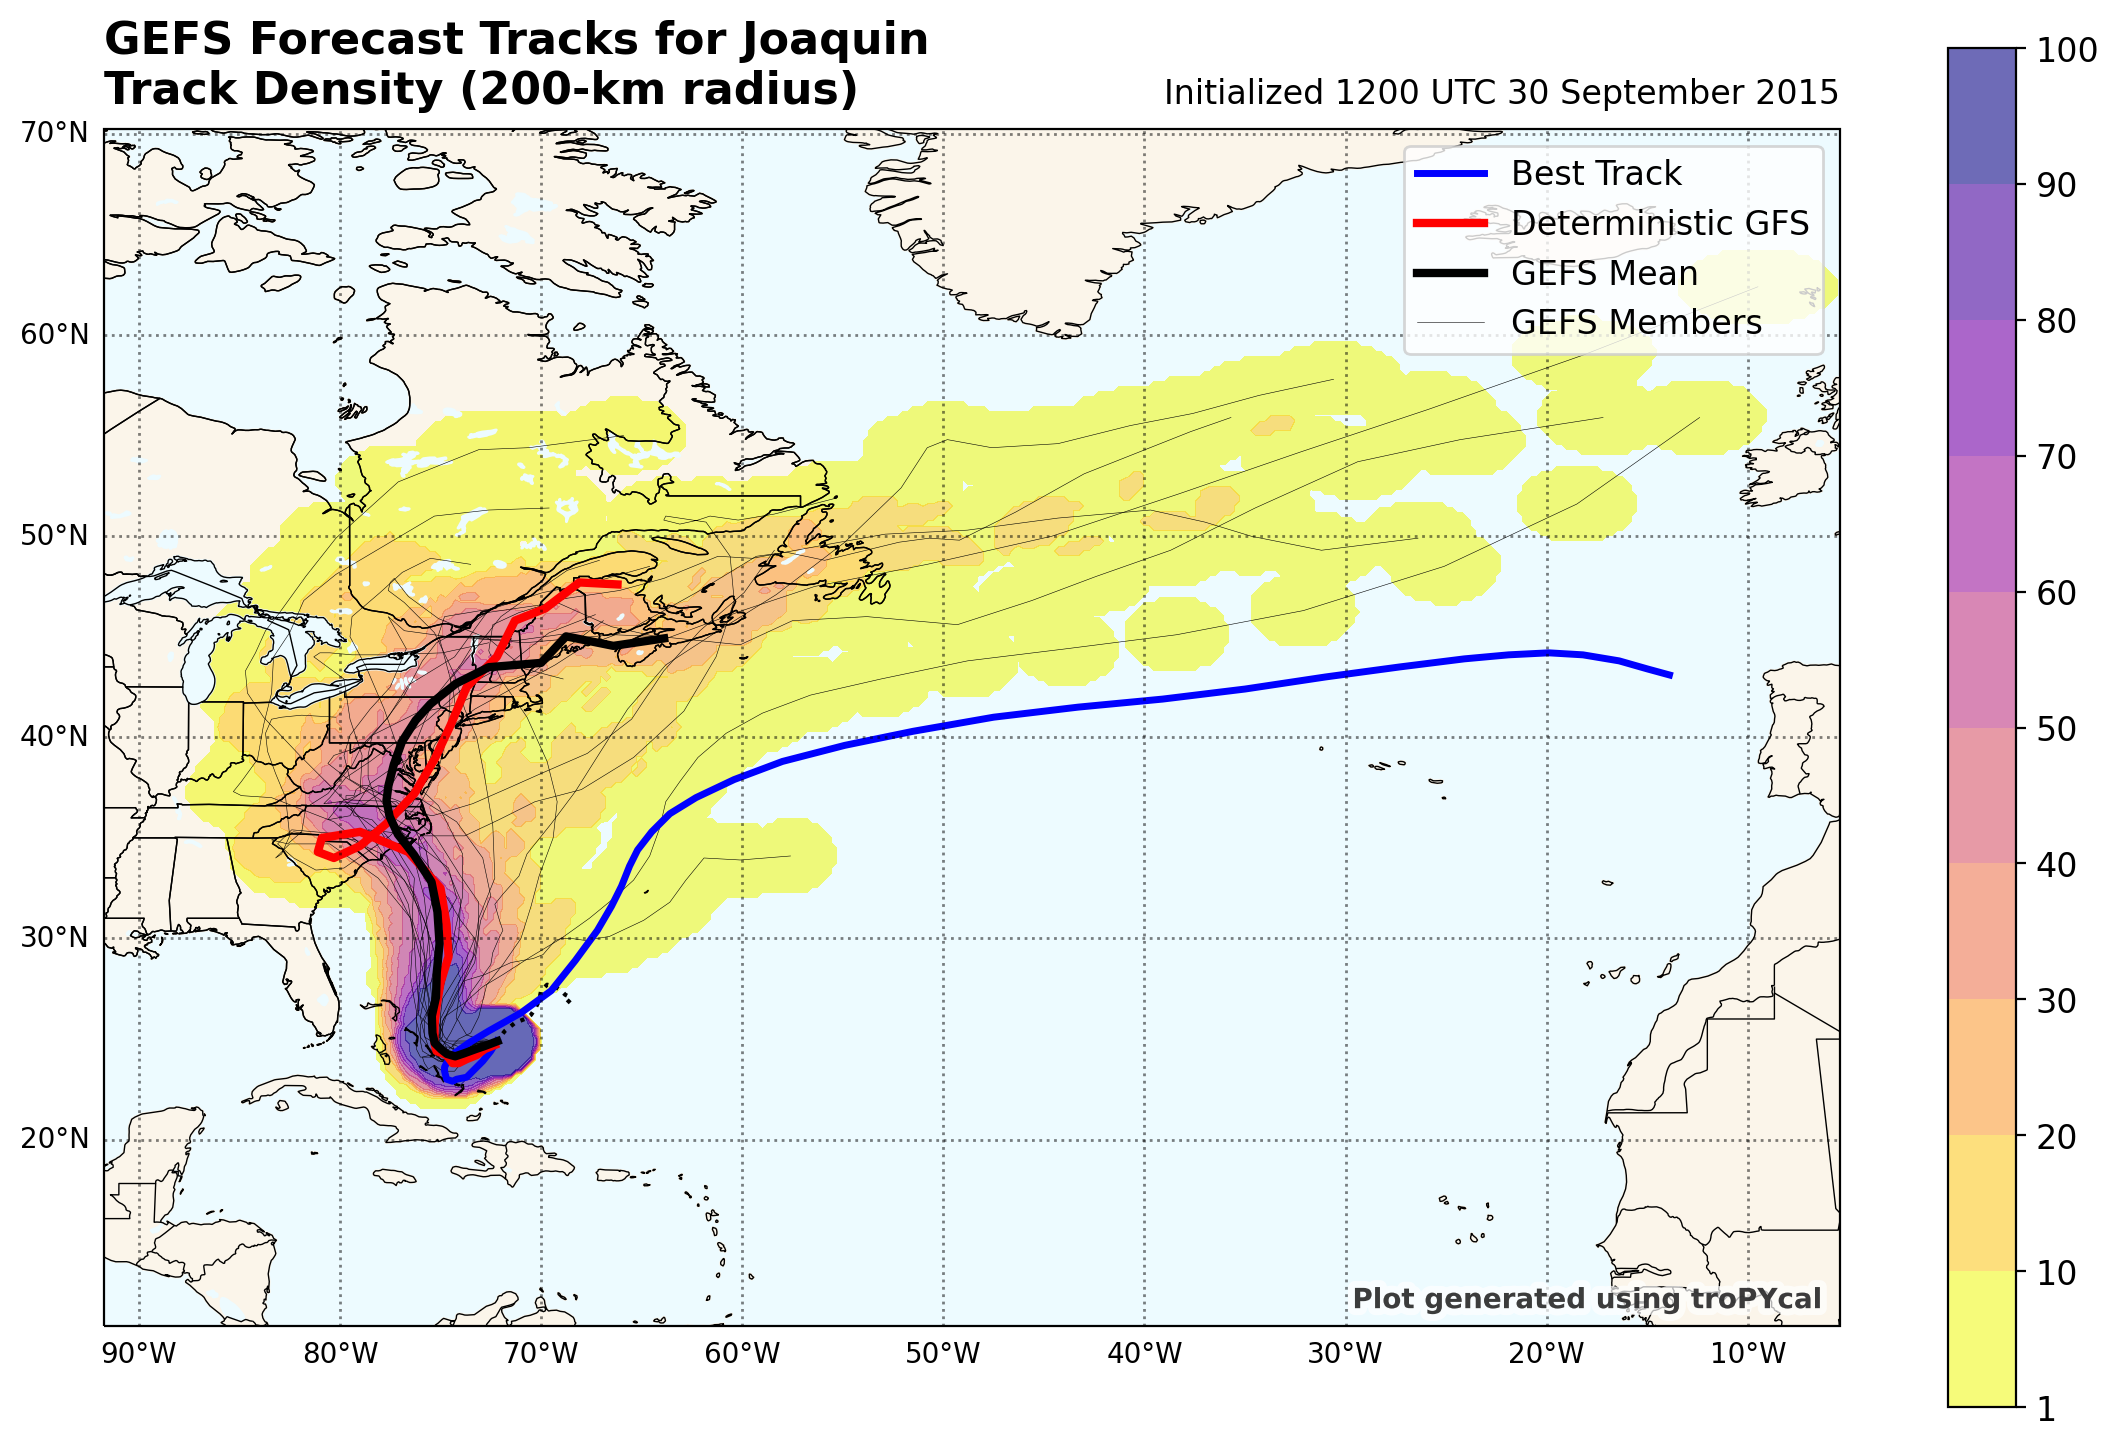

In [4]:
import datetime as dt
forecast_init = dt.datetime(2015,9,30,12)

storm.plot_ensembles(forecast=forecast_init)

We can also pick a specific forecast hour to zero in on, which instead of showing a cumulative track density map will now show the track density valid at that specific forecast hour, alongside an ellipse representing ensemble position spread:

<GeoAxesSubplot:title={'left':'GEFS Forecast Tracks for Joaquin\nTrack Density (200-km radius)','right':'Hour 108 | Valid 0000 UTC 05 October 2015\nInitialized 1200 UTC 30 September 2015'}>

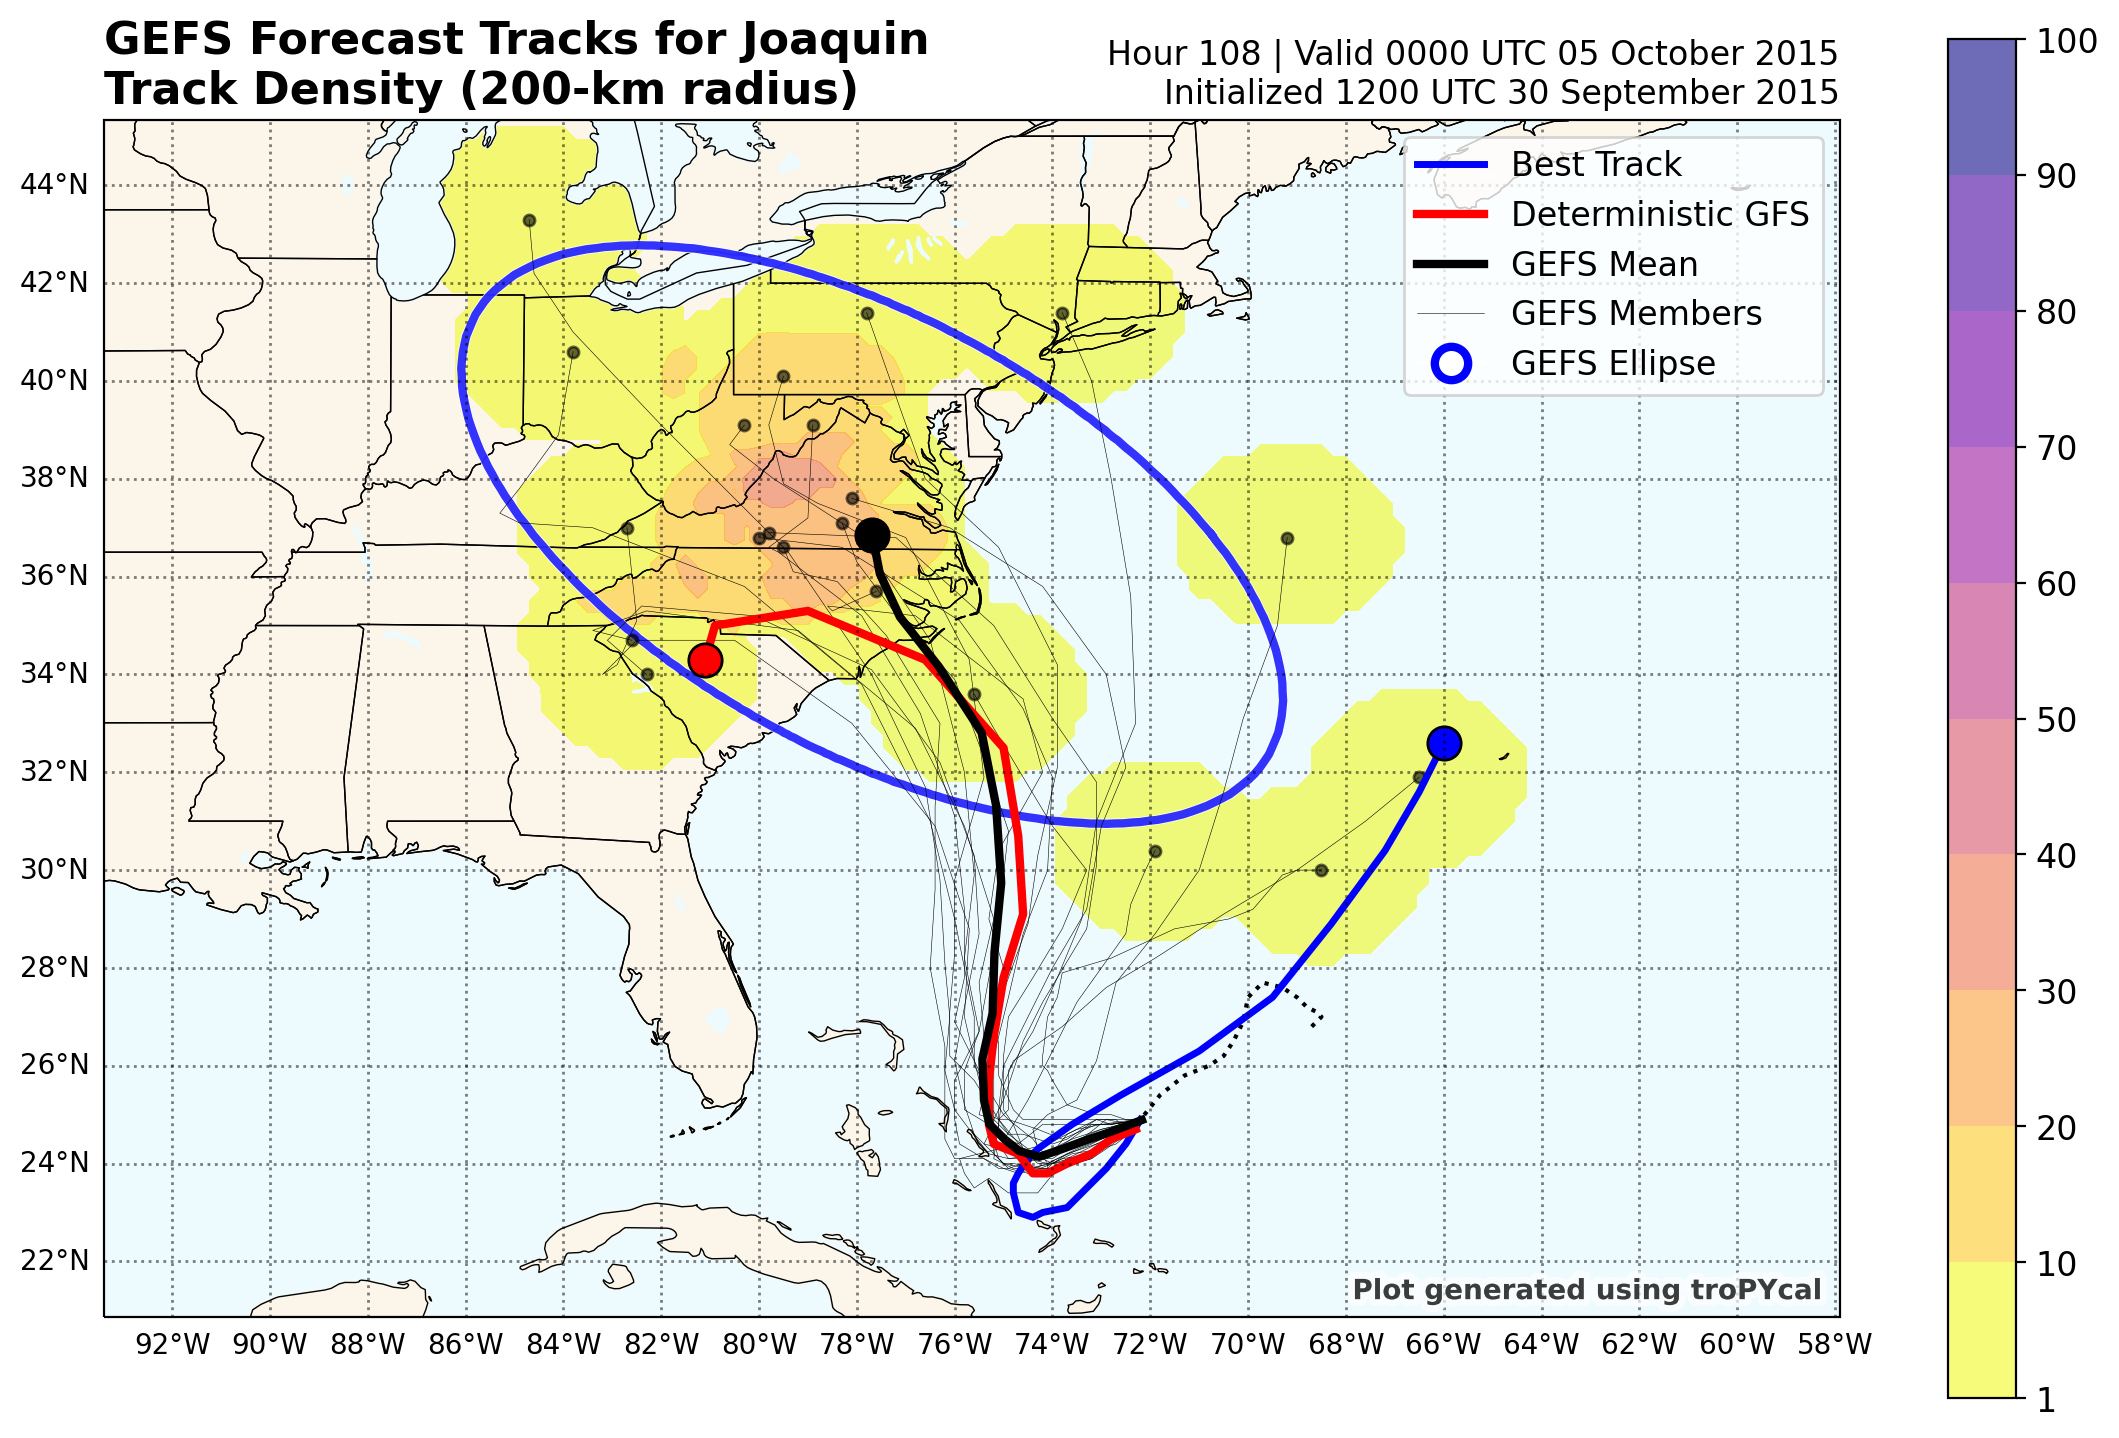

In [5]:
storm.plot_ensembles(forecast=forecast_init, fhr=108)

Check out the documentation for more plot customization options, such as editing the density radius (the default is 200 km), which lines to plot and their width and colors.

Alternatively, we can also look at all forecast models initialized at the same time, compared against Best Track verification:

<GeoAxesSubplot:title={'left':'Model Forecast Tracks for Joaquin','right':'Initialized 1200 UTC 30 September 2015'}>

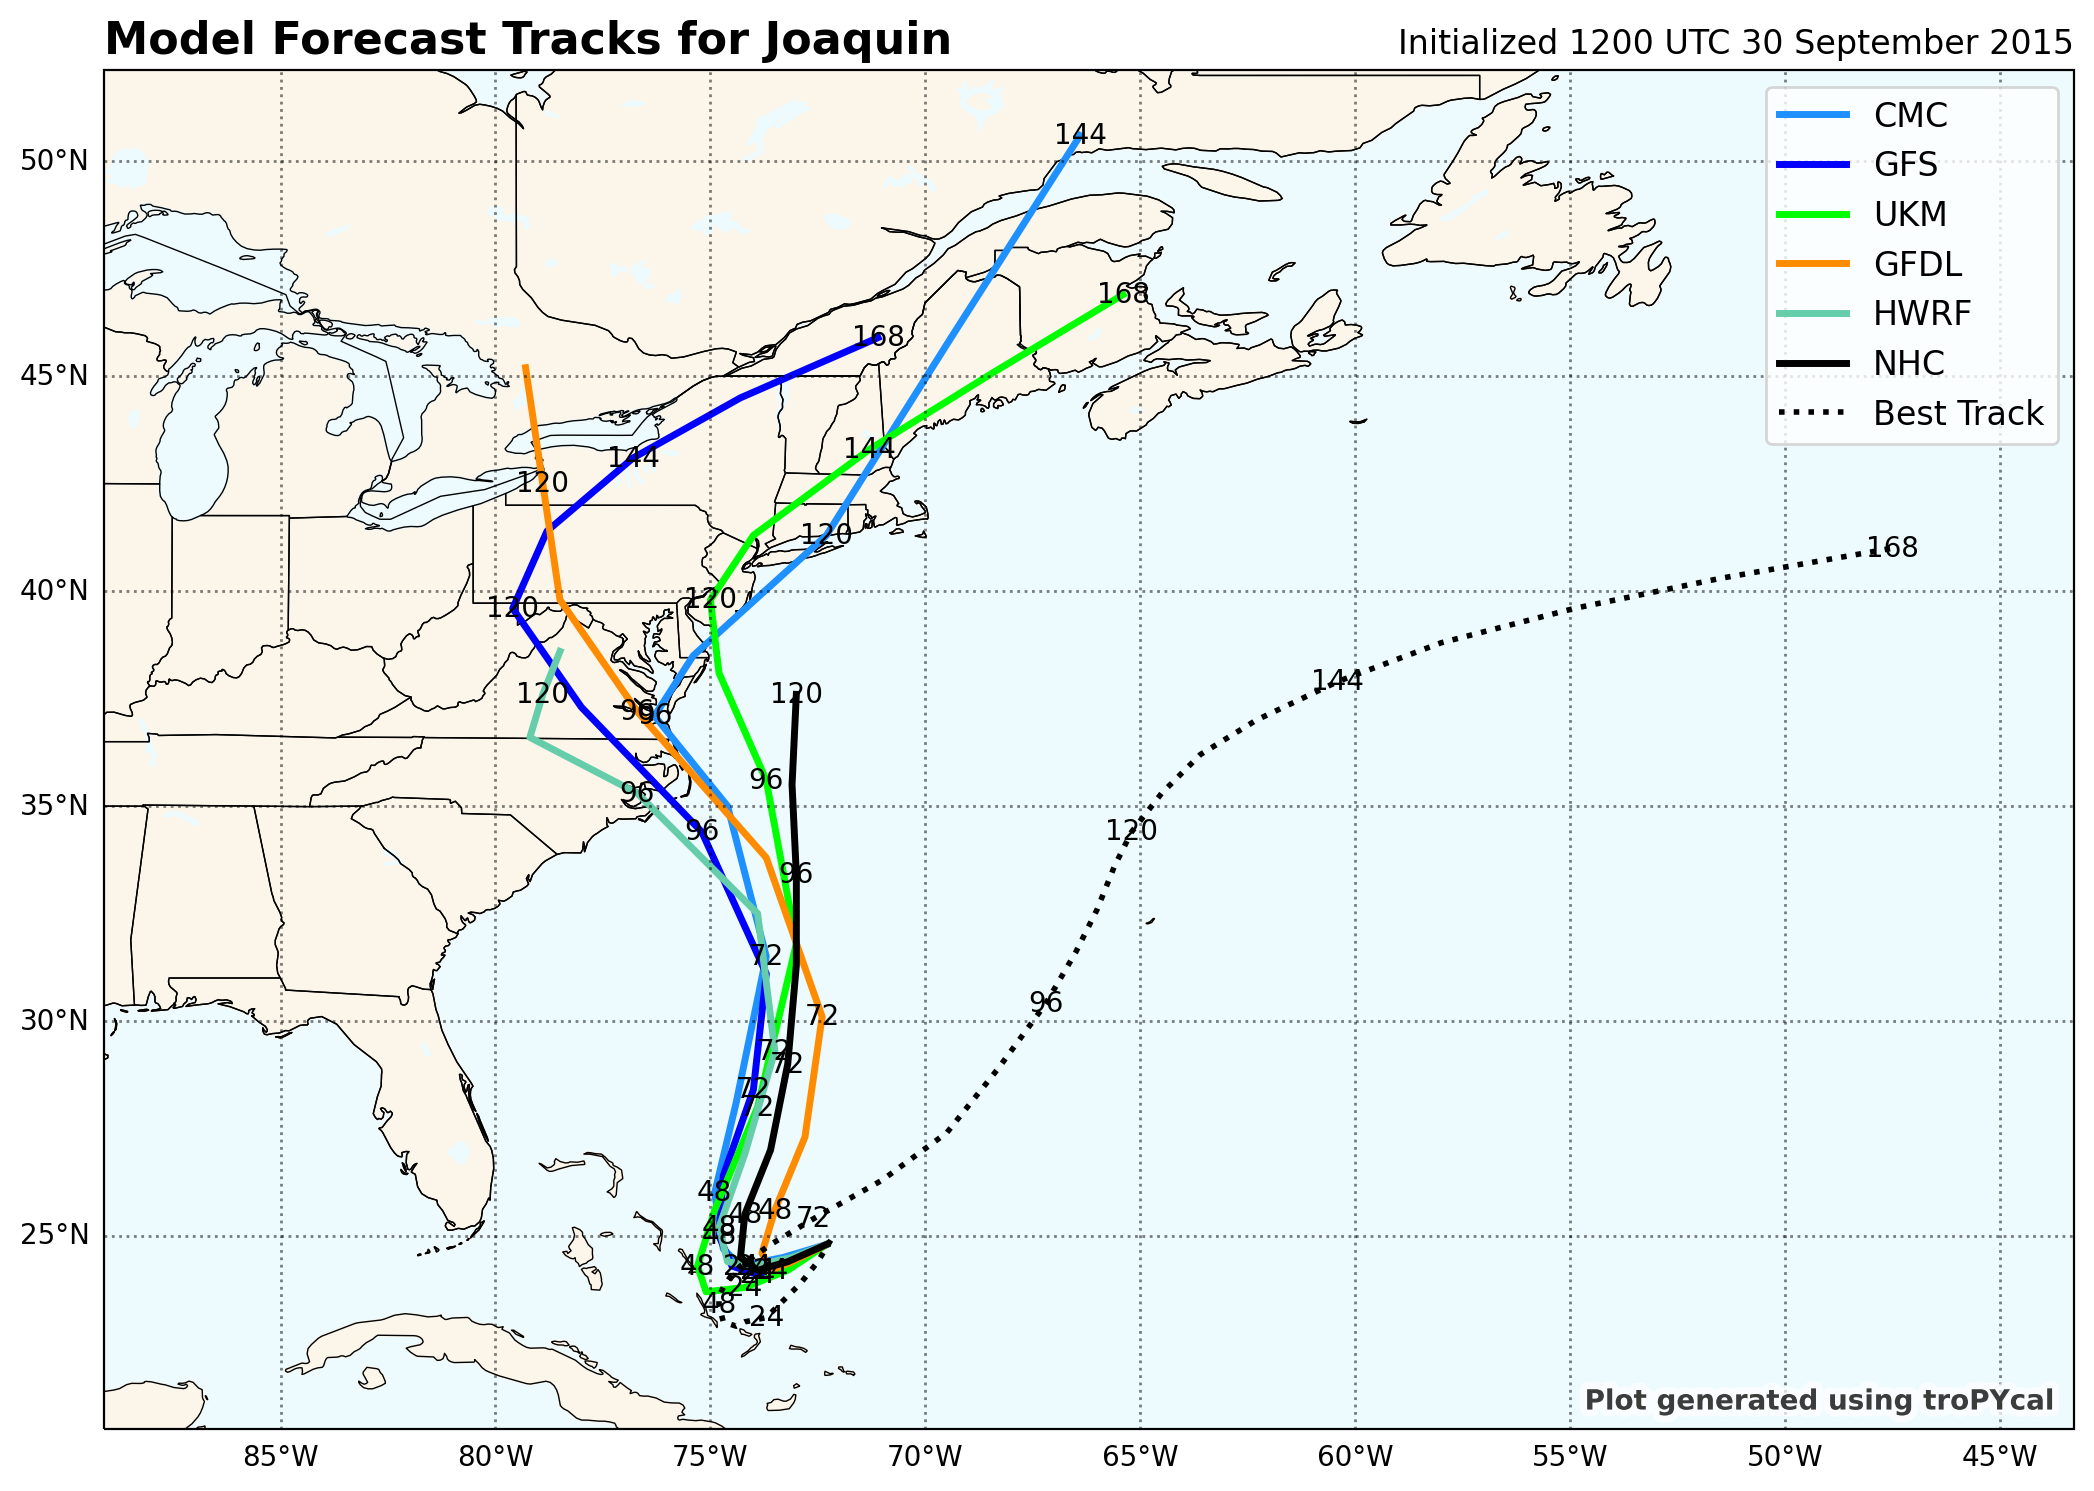

In [6]:
storm.plot_models(forecast=forecast_init, plot_btk=True)

This plot also has plenty of customization options. One which we'll show below is customizing which forecast hour(s) are labeled. Let's focus specifically on forecast hour 96, with dots instead of number labels:

<GeoAxesSubplot:title={'left':'Model Forecast Tracks for Joaquin','right':'Initialized 1200 UTC 30 September 2015'}>

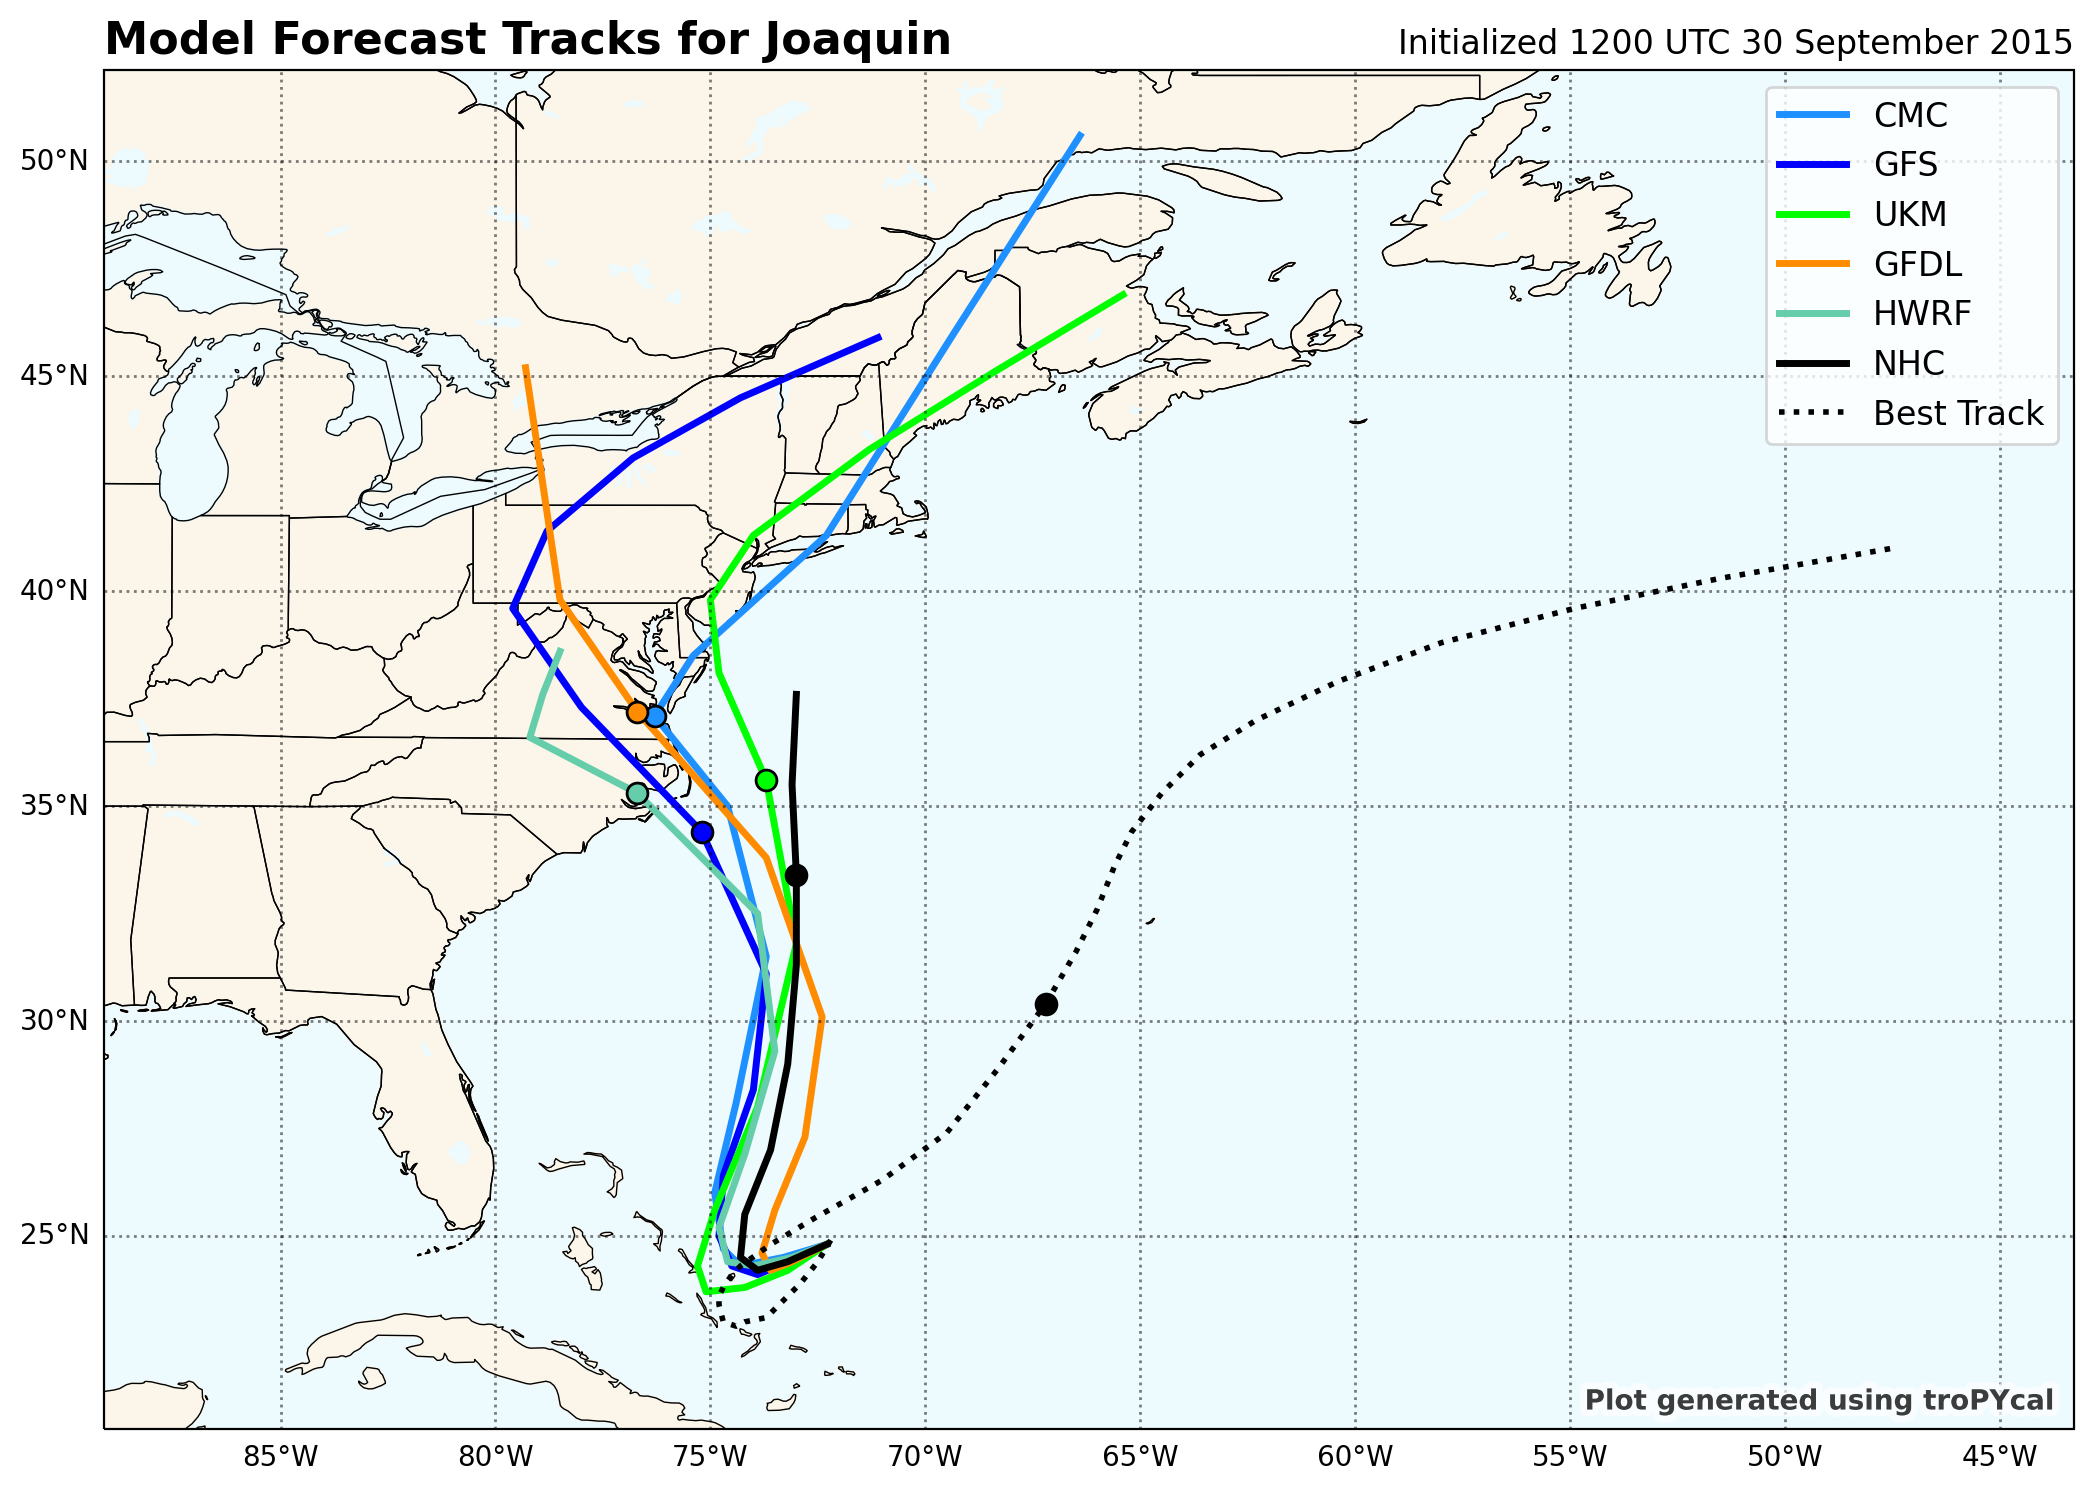

In [7]:
storm.plot_models(forecast=forecast_init, plot_btk=True, prop={'marker':'dot','marker_hours':[96]})

## Recon Mission & Realtime

Two new components are now available in the ``recon`` module! First we'll take a look at the RealtimeRecon class. Let's create an instance of RealtimeRecon:

In [8]:
obj = recon.RealtimeRecon()
obj

--> Searching for active missions
--> Completed retrieving active missions (6.9 seconds)


<tropycal.recon.RealtimeRecon>
Dataset Summary:
    Numbers of active missions: 1

We can see there is 1 active mission at the time this script was ran. This function shows the IDs of all active missions:

In [9]:
obj.get_mission_ids()

['AF307-WXWXA-220711141752307']

Let's examine this mission further by retrieving it using ``get_mission()``. The resulting summary printed below shows a quick high-level summary of this recon mission data:

In [10]:
mission = obj.get_mission(obj.get_mission_ids()[0])
mission

<tropycal.recon.Mission>
Mission Summary:
    Dropsondes:                   1
    VDMs:                         0
    Max 30sec flight level wind:  26.0 knots
    Max 10sec flight level wind:  27.0 knots
    Max SFMR wind:                22.0 knots
    Min surface pressure:         1005.0 hPa

Attributes:
    aircraft:    AF307
    storm_name:  220711141752307
    mission_id:  AF307-WXWXA-220711141752307
    start_time:  2022-07-11 14:28:30
    end_time:    2022-07-11 16:28:00

Let's see what the path of this mission was:

<GeoAxesSubplot:title={'left':'Mission ID: AF307-WXWXA-220711141752307\nRecon: 30s FL wind speed (kt)','right':'Start ... 14:28 UTC 11 Jul 2022\nEnd ... 16:28 UTC 11 Jul 2022'}>

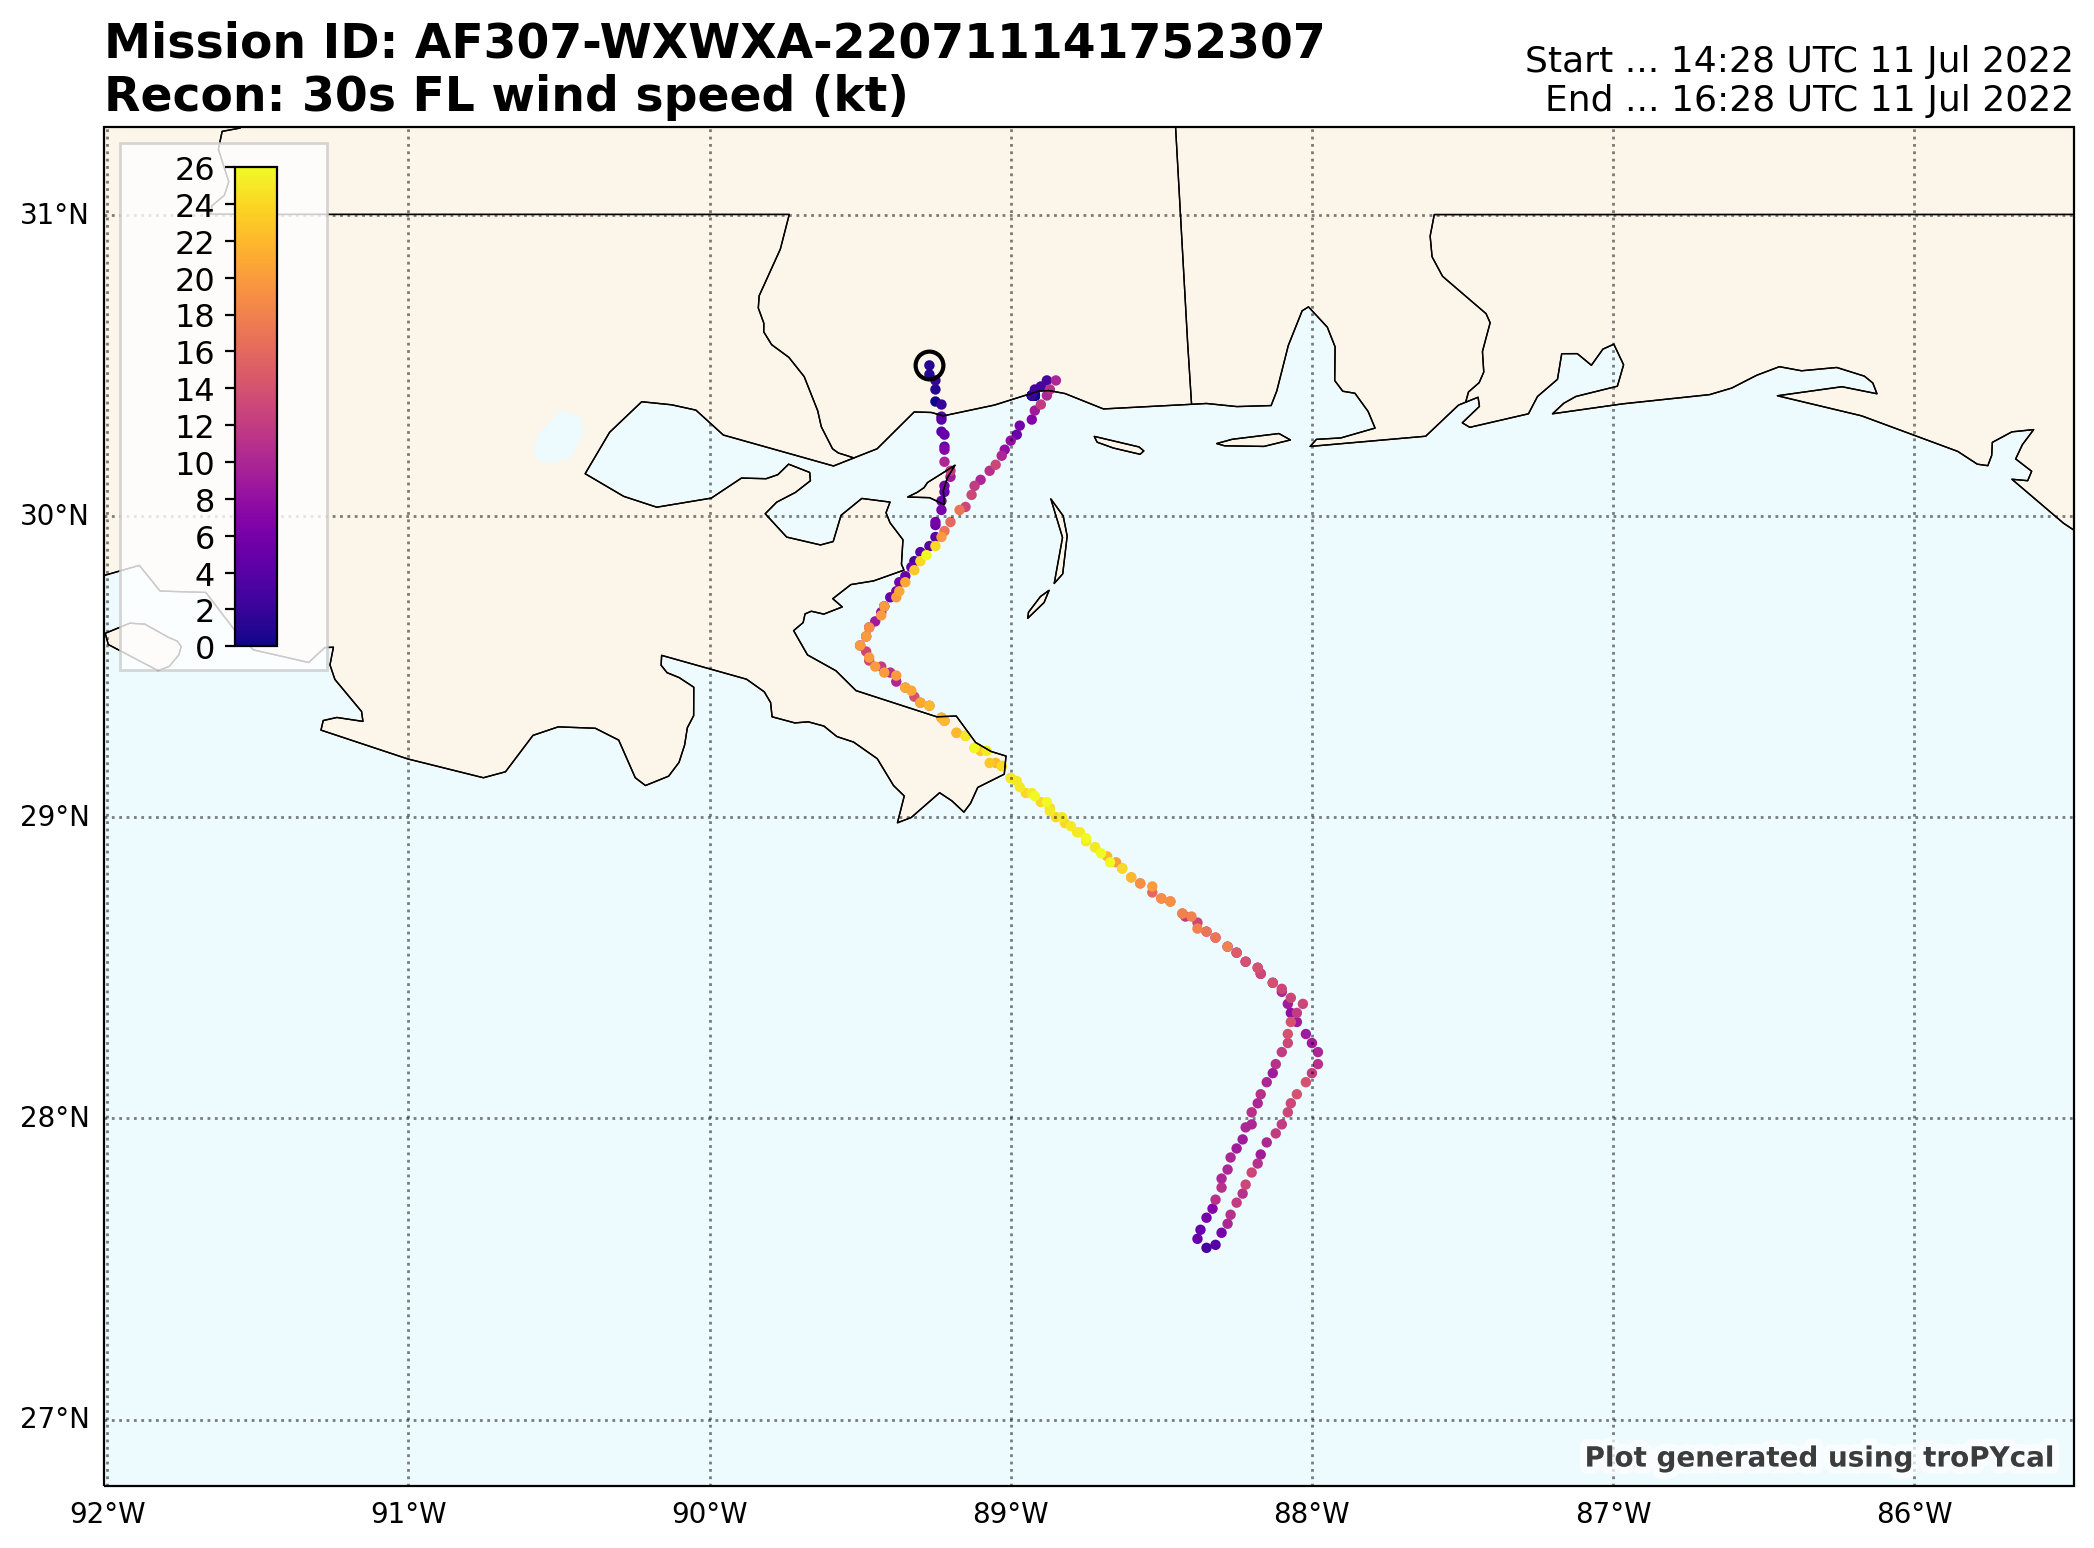

In [11]:
mission.plot_points()

Alternatively, we can also retrieve Mission objects for archived storms. Let's use the case of Hurricane Michael (2018):

In [12]:
#Retrieve Storm object
storm = basin.get_storm(('michael',2018))

#Download all recon data for this storm (will take several minutes for storms with many missions)
recon_obj = storm.get_recon()

Searching through recon VDM files between 20181006 and 20181015 ...
--> Completed reading in recon VDM files (7.0 seconds)
Read 45 files
Searching through recon HDOB files between 20181006 and 20181016 ...
--> Completed reading in recon HDOB files (112.7 seconds)
Read 666 files
Unable to decode 3 files
Searching through recon dropsonde files between 201810051800 and 201810161800 ...
--> Completed reading in recon dropsonde files (45.8 seconds)
Read 280 files


To start, we can quickly plot derived surface wind for all missions:

<GeoAxesSubplot:title={'left':'Hurricane MICHAEL\nRecon: SFMR 10s sfc wind speed (kt)','right':'Start ... 14:53 UTC 07 Oct 2018\nEnd ... 18:14 UTC 10 Oct 2018'}>

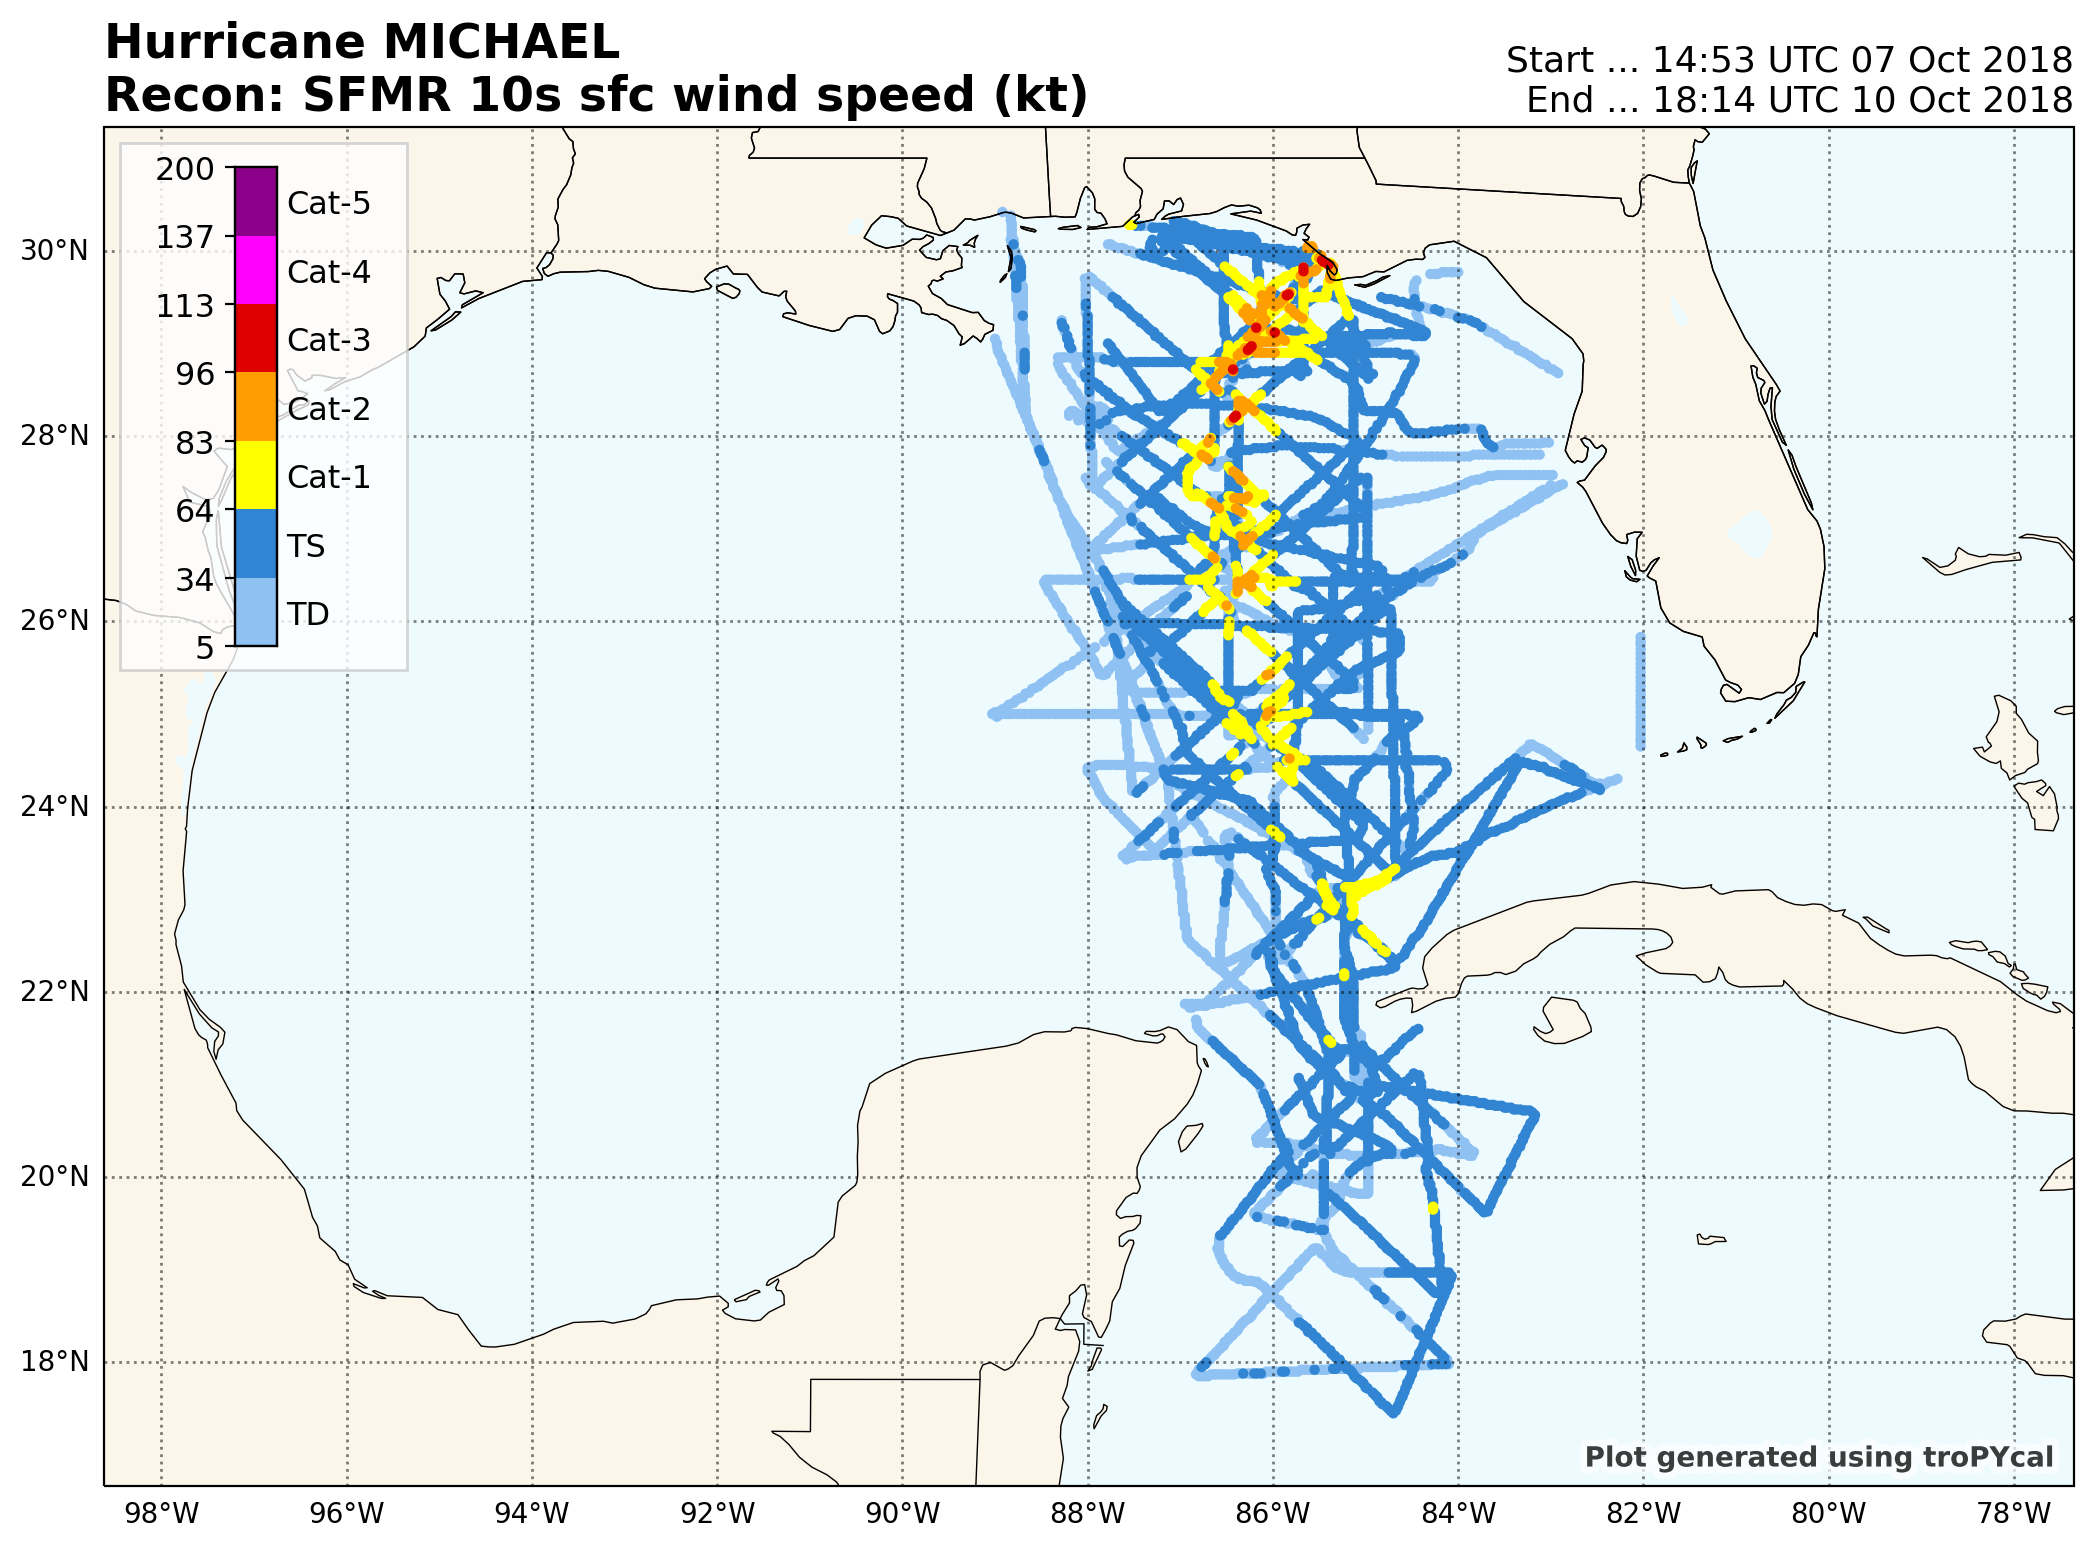

In [13]:
recon_obj.hdobs.plot_points('sfmr')

Let's now look at all available mission IDs for this storm:

In [14]:
print(recon_obj.find_mission())

['01', '02', '03', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', 'WA']


Let's retrieve mission #13 as Hurricane Michael neared landfall:

In [15]:
mission = recon_obj.get_mission('13')
print(mission)

<tropycal.recon.Mission>
Mission Summary:
    Dropsondes:                   18
    VDMs:                         6
    Max 30sec flight level wind:  135.0 knots
    Max 10sec flight level wind:  136.0 knots
    Max SFMR wind:                125.0 knots
    Min surface pressure:         926.8 hPa

Attributes:
    aircraft:    AF306
    storm_name:  MICHAEL
    mission_id:  AF306-1314A-MICHAEL
    start_time:  2018-10-10 03:38:00
    end_time:    2018-10-10 13:57:30


We can plot the high density observations (HDOBs) for this mission, along with an optional ``in_storm=True`` flag using an in-house algorithm to determine when a recon mission is inside the storm:

<GeoAxesSubplot:title={'left':'Mission ID: AF306-1314A-MICHAEL\nRecon: SFMR 10s sfc wind speed (kt)','right':'Start ... 04:45 UTC 10 Oct 2018\nEnd ... 13:57 UTC 10 Oct 2018'}>

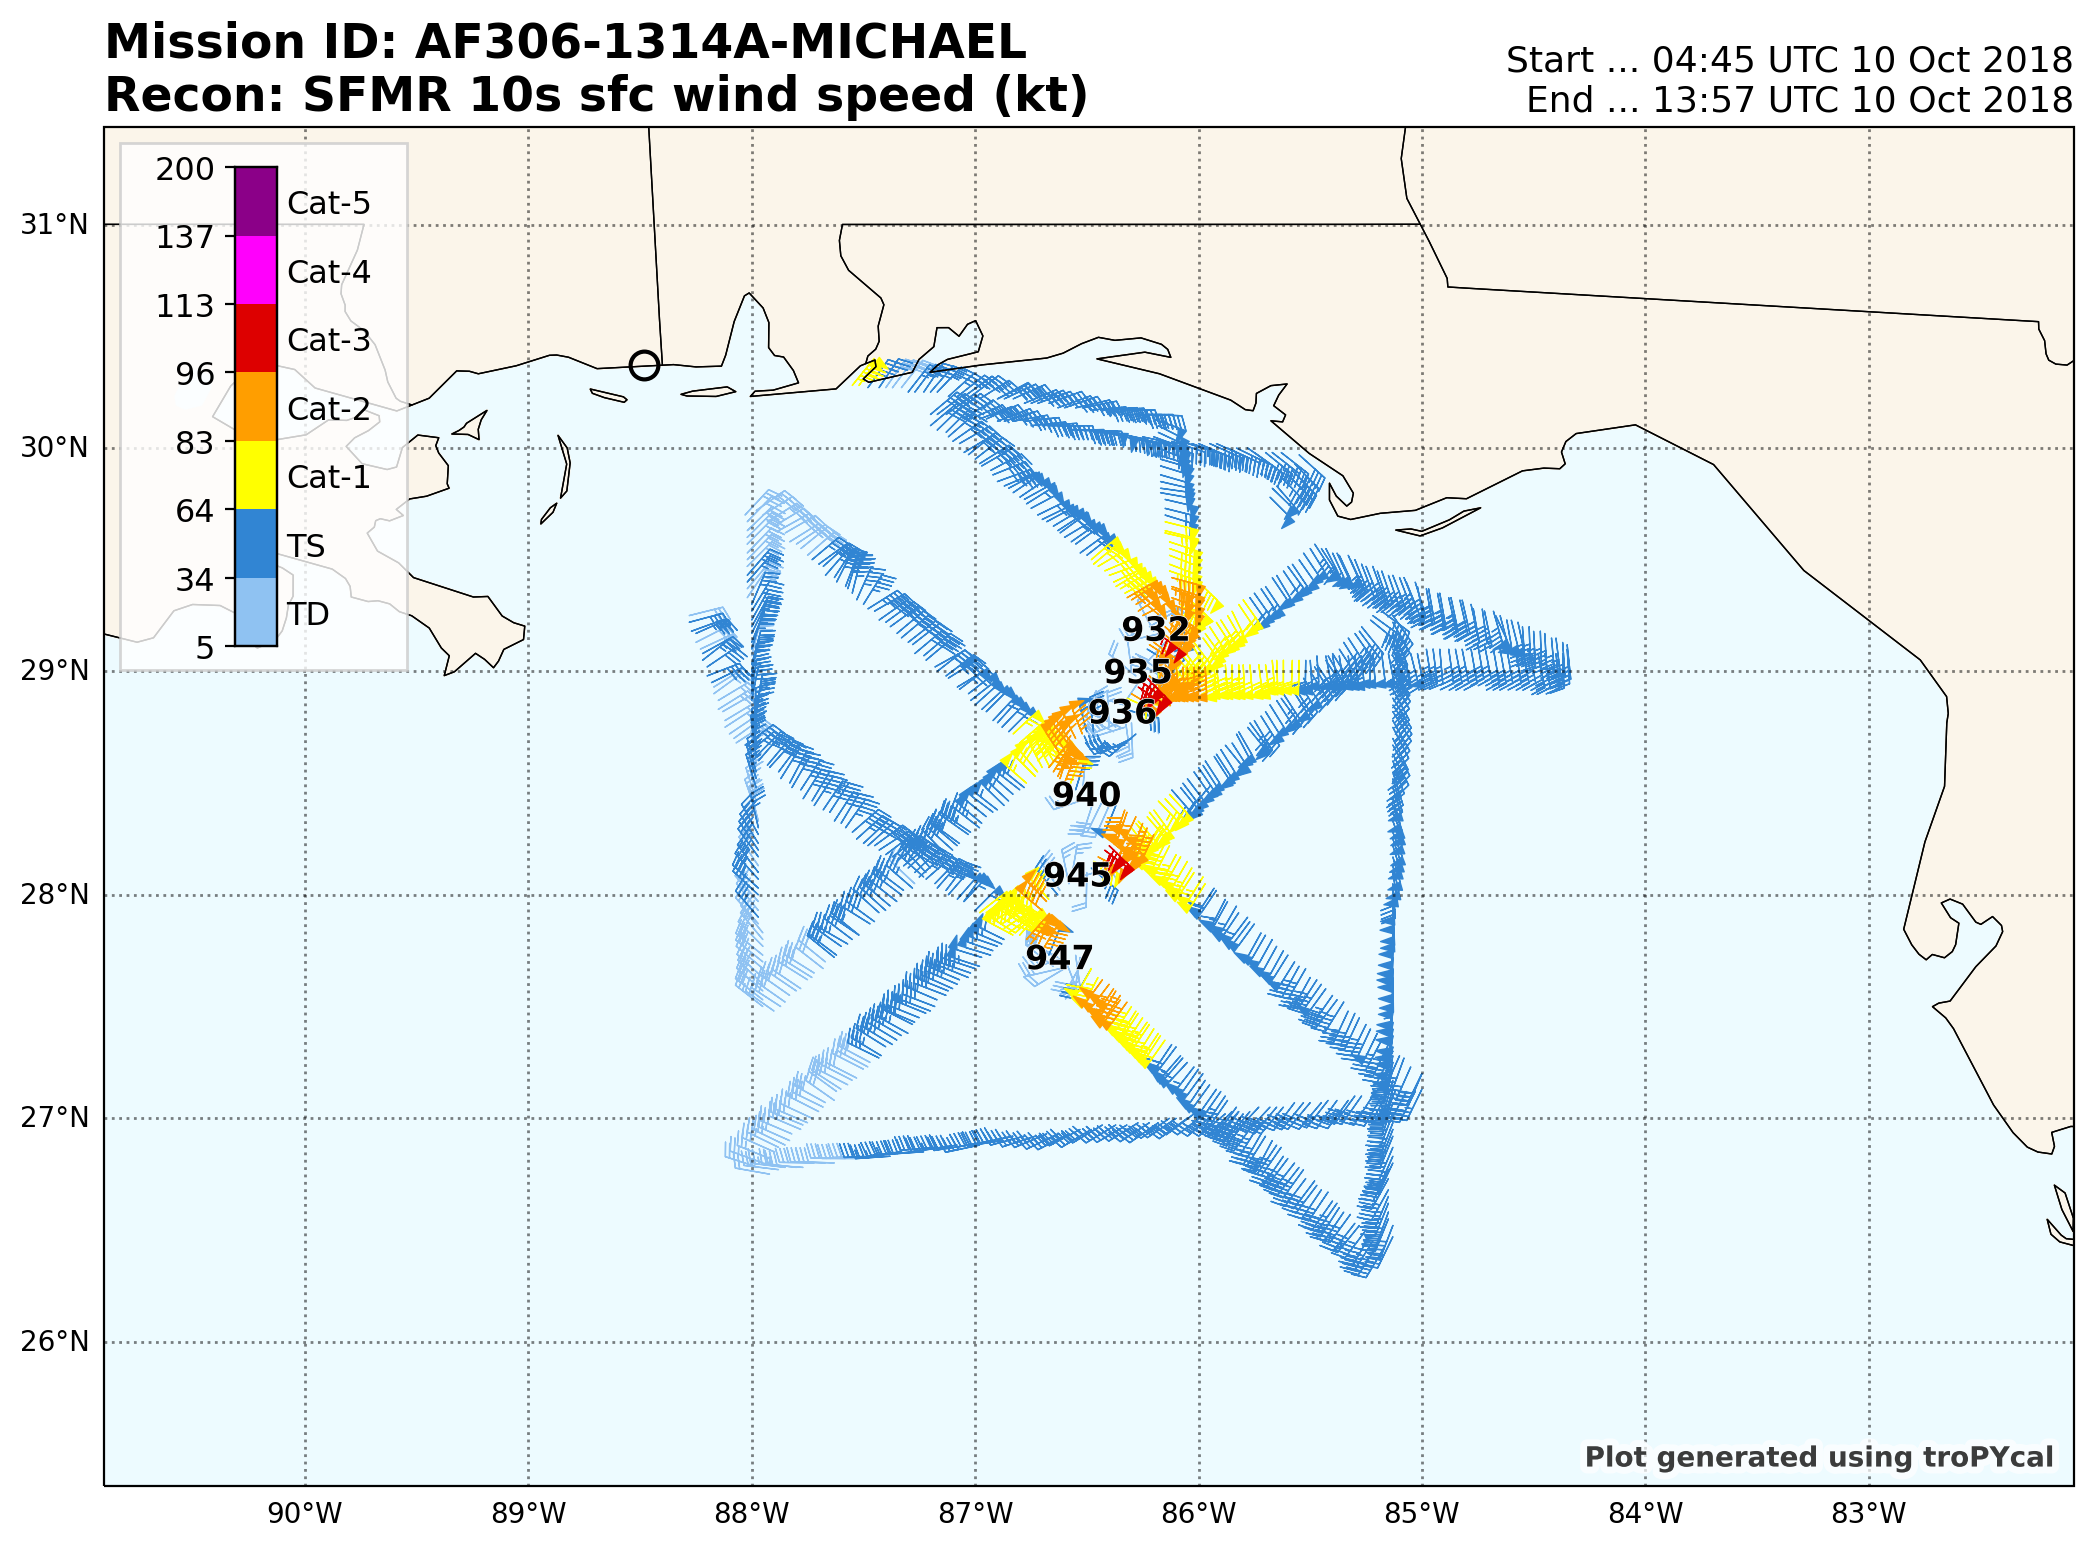

In [16]:
mission.plot_points('sfmr',barbs=True,in_storm=True,plot_vdms=True)

Let's look at a time series of this mission:

<AxesSubplot:title={'left':'\nRecon Aircraft HDOBs\nMission ID: AF306-1314A-MICHAEL','right':'Plot generated using Tropycal'}, ylabel='Mean Sea Level Pressure (hPa)'>

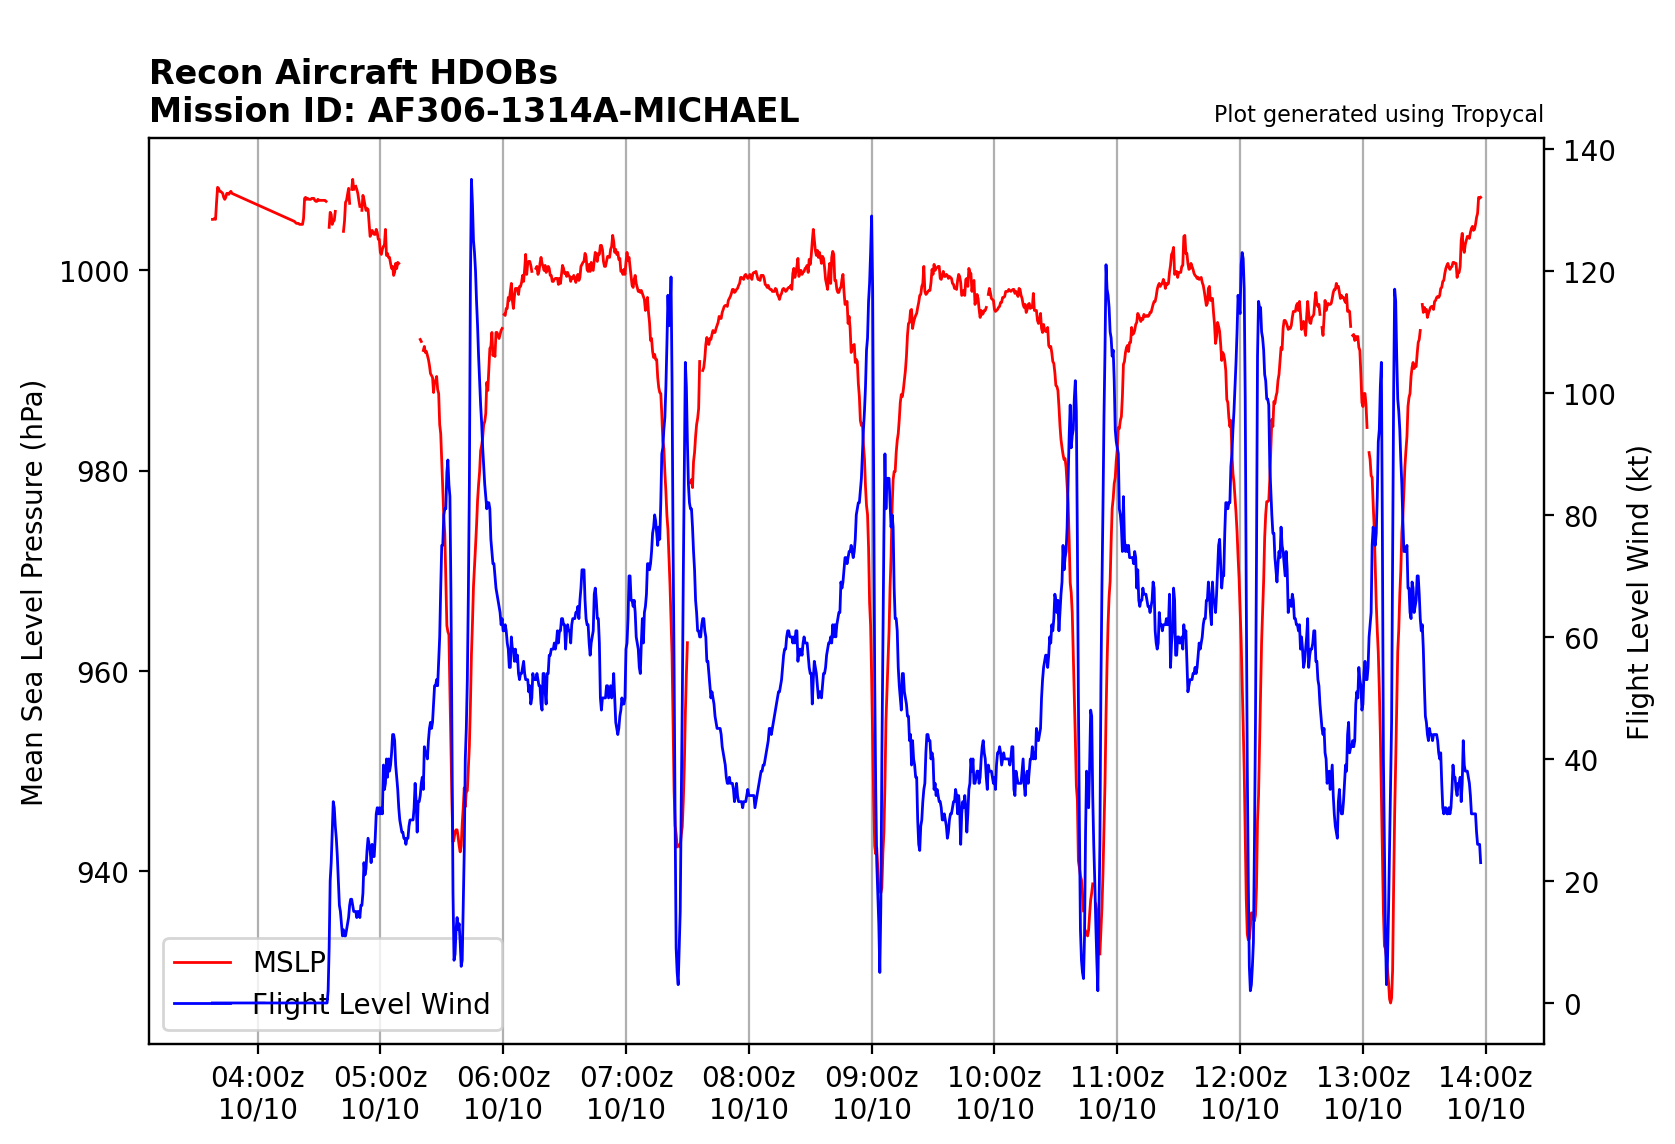

In [17]:
mission.plot_time_series()

Let's focus in on the last 3 passes, comparing SFMR (with dots) to flight-level wind:

<AxesSubplot:title={'left':'\nRecon Aircraft HDOBs\nMission ID: AF306-1314A-MICHAEL','right':'Plot generated using Tropycal'}, ylabel='Surface Wind (kt)'>

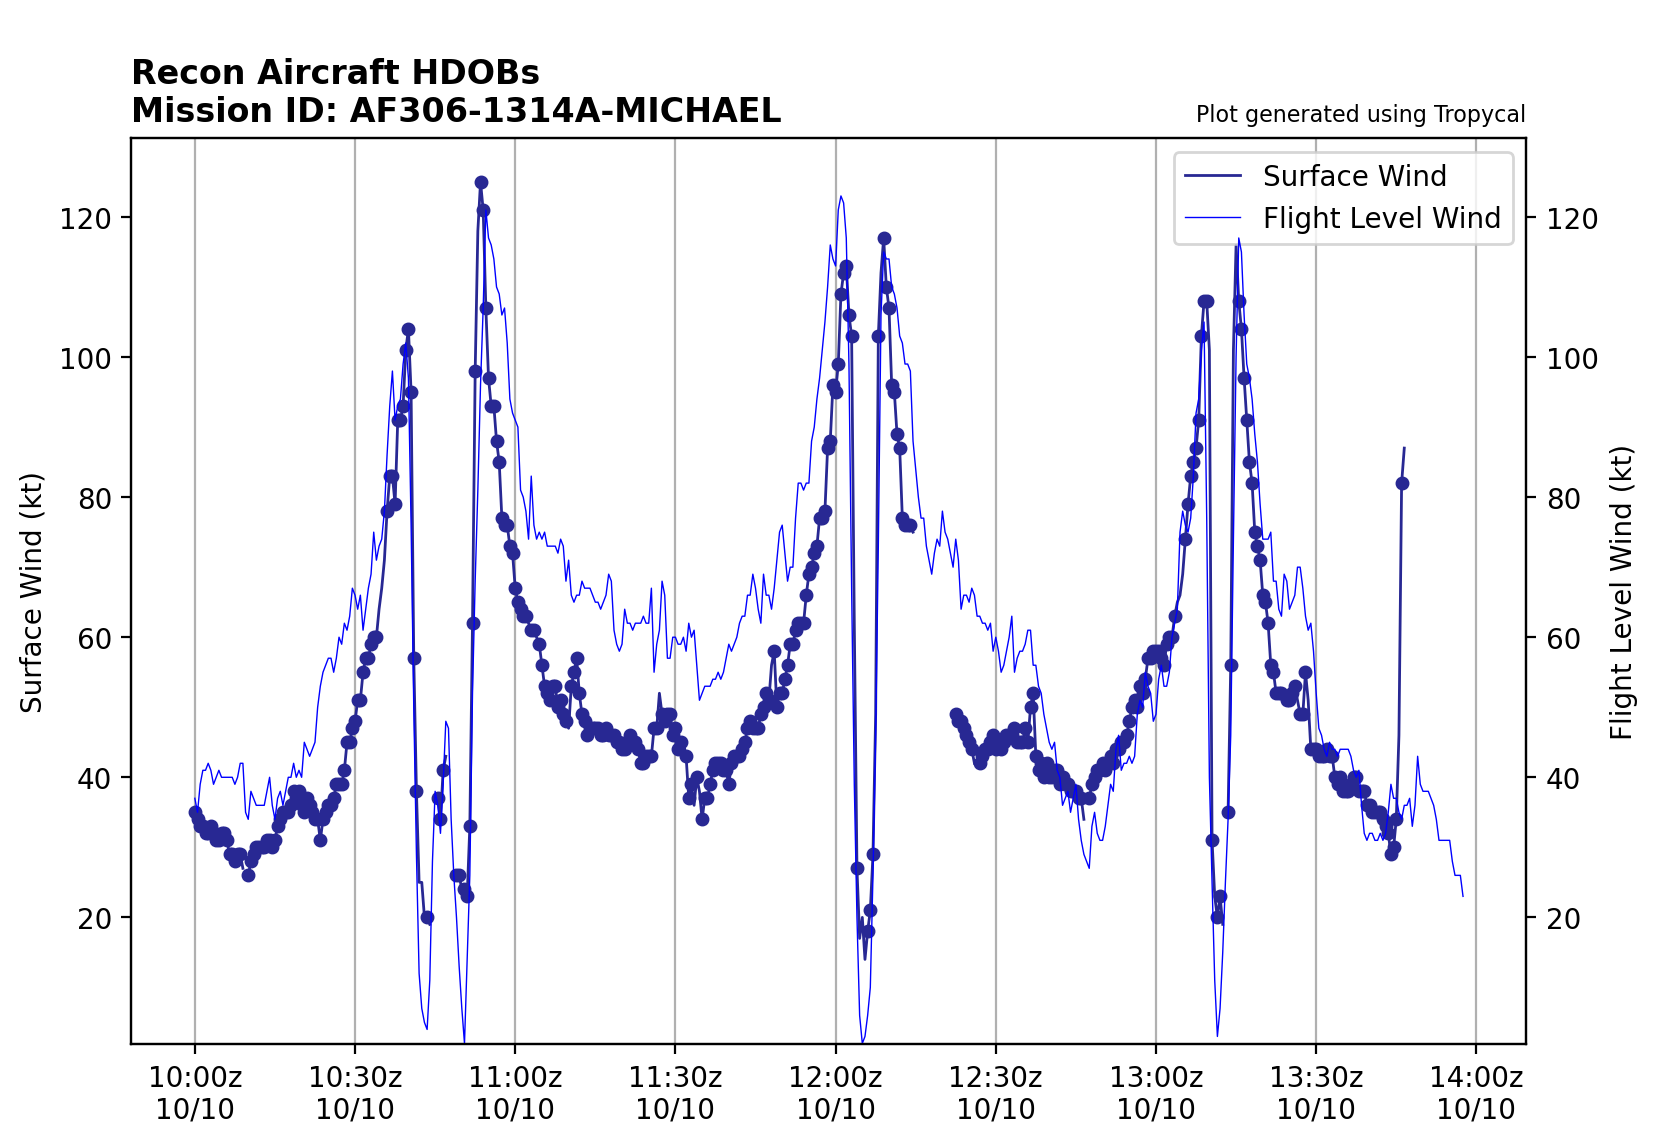

In [18]:
mission.plot_time_series(varname=('sfmr','wspd'),
                         time=(dt.datetime(2018,10,10,10),dt.datetime(2018,10,10,14)),
                         left_prop={'ms':4},
                         right_prop={'linewidth':0.5})

## Realtime Recon Data

It should be noted that the data stored in ``RealtimeRecon`` is fetched from the NHC archive (https://www.nhc.noaa.gov/recon.php), which is generally up to date but can lag by up to 30-40 minutes on occasion.

To get the very latest recon data, the function ``get_hdobs_realtime()`` does the job, fetching the very latest 10-minute HDOBs directly from the NHC website, removing any flagged observations, and displaying the parsed data if requested.

Let's examine the latest available recon mission in the North Atlantic basin from the Air Force aircraft:

In [19]:
obj.get_hdobs_realtime(basin='north_atlantic',aircraft='usaf')

{'mission_id': 'AF307-WXWXA-220711141752307',
 'min_mslp': 1012.3,
 'max_sfmr': nan,
 'max_wspd': 12.0,
 'max_temp': 22.4,
 'max_dwpt': 17.5,
 'start_time': Timestamp('2022-07-11 16:18:30'),
 'end_time': Timestamp('2022-07-11 16:28:00')}

## Cross-Basin Storm Support

Hurricane Bonnie (2022) was a rare crossover storm that remained intact while crossing from the North Atlantic to the East Pacific basins. Before Bonnie, Otto (2016) was the most recent such storm, but beforehand the old rule was to rename storms crossing basins, resulting in them becoming split in the HURDATv2 reanalysis.

With the option to combine basins, as of Tropycal v0.5 these cross-basin storms are now automatically merged. Let's read in a combined North Atlantic-East Pacific basin object:

In [20]:
combined = tracks.TrackDataset('both')

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (10.41 seconds)


The most recent crossover storm that was renamed was Cesar-Douglas (1996). Let's retrieve this storm and examine it:

In [21]:
storm = combined.get_storm(('cesar-douglas',1996))
storm.to_dataframe()

date  extra_obs special type   lat    lon  vmax  mslp  \
0  1996-07-24 18:00:00          0           TD  11.8  -62.6    25  1009   
1  1996-07-25 00:00:00          0           TD  11.9  -64.7    25  1009   
2  1996-07-25 06:00:00          0           TD  11.9  -66.5    30  1007   
3  1996-07-25 12:00:00          0           TS  12.1  -68.1    40  1004   
4  1996-07-25 18:00:00          0           TS  12.3  -69.6    40  1002   
5  1996-07-26 00:00:00          0           TS  12.4  -71.0    40  1002   
6  1996-07-26 06:00:00          0           TS  12.4  -72.7    40  1002   
7  1996-07-26 12:00:00          0           TS  12.3  -74.5    45  1002   
8  1996-07-26 18:00:00          0           TS  11.9  -76.1    50  1002   
9  1996-07-27 00:00:00          0           TS  11.7  -77.2    50  1000   
10 1996-07-27 06:00:00          0           TS  11.6  -78.1    60   992   
11 1996-07-27 12:00:00          0           HU  11.6  -79.5    70   992   
12 1996-07-27 18:00:00          0           HU  11.8  -81.0    65   994   
13 1996-07-28 00:00:00          0           HU  12.0  -82.6    70   992   
14 1996-07-28 04:00:00          1       L   HU  12.2  -83.9    75   985   
15 1996-07-28 06:00:00          0           HU  12.3  -84.2    70   990   
16 1996-07-28 12:00:00          0           TS  12.7  -86.2    50   995   
17 1996-07-28 18:00:00          0           TS  13.1  -87.9    35  1004   
18 1996-07-29 00:00:00          0           TS  13.0  -89.7    35  1004   
19 1996-07-29 06:00:00          0           TS  13.1  -91.6    40  1001   
20 1996-07-29 12:00:00          0           HU  13.3  -93.4    65   987   
21 1996-07-29 18:00:00          0           HU  13.4  -95.2    65   982   
22 1996-07-30 00:00:00          0           HU  13.6  -96.9    70   980   
23 1996-07-30 06:00:00          0           HU  13.9  -98.7    75   977   
24 1996-07-30 12:00:00          0           HU  14.3 -100.4    80   975   
25 1996-07-30 18:00:00          0           HU  14.9 -102.0    85   970   
26 1996-07-31 00:00:00          0           HU  15.5 -103.4    90   968   
27 1996-07-31 06:00:00          0           HU  16.0 -104.7    95   965   
28 1996-07-31 12:00:00          0           HU  16.5 -105.9   100   960   
29 1996-07-31 18:00:00          0           HU  17.0 -107.0   105   958   
30 1996-08-01 00:00:00          0           HU  17.6 -108.0   115   952   
31 1996-08-01 06:00:00          0           HU  18.2 -109.0   115   948   
32 1996-08-01 12:00:00          0           HU  18.9 -110.0   115   946   
33 1996-08-01 18:00:00          0           HU  19.5 -111.2   115   947   
34 1996-08-02 00:00:00          0           HU  20.0 -112.6   115   948   
35 1996-08-02 06:00:00          0           HU  20.4 -113.9   115   950   
36 1996-08-02 12:00:00          0           HU  20.6 -115.4   110   955   
37 1996-08-02 18:00:00          0           HU  20.8 -116.8   100   965   
38 1996-08-03 00:00:00          0           HU  20.9 -118.1    80   970   
39 1996-08-03 06:00:00          0           HU  21.1 -119.3    65   975   
40 1996-08-03 12:00:00          0           TS  21.1 -120.3    60   980   
41 1996-08-03 18:00:00          0           TS  21.2 -121.3    55   988   
42 1996-08-04 00:00:00          0           TS  21.4 -122.3    50   993   
43 1996-08-04 06:00:00          0           TS  21.6 -123.2    45   995   
44 1996-08-04 12:00:00          0           TS  21.7 -124.2    40  1000   
45 1996-08-04 18:00:00          0           TS  21.9 -125.3    35  1003   
46 1996-08-05 00:00:00          0           TD  22.1 -126.4    30  1005   
47 1996-08-05 06:00:00          0           TD  22.3 -127.5    30  1009   
48 1996-08-05 12:00:00          0           TD  22.4 -128.7    30  1009   
49 1996-08-05 18:00:00          0           TD  22.5 -129.9    25  1009   
50 1996-08-06 00:00:00          0           TD  22.5 -130.0    20  1009   

         wmo_basin  
0   north_atlantic  
1   north_atlantic  
2   north_atlantic  
3   north_atlantic  
4   north_at

Looking at the ``wmo_basin`` column above, notice how the basin changes from North Atlantic to East Pacific. Beginning with Tropycal v0.5, a custom shape delineating the North Atlantic/East Pacific basins is used to objectively determine when a storm crosses between both basins, which furthermore allows for more accurate basin-wide ACE calculations by only factoring in the ACE contribution from crossover storms only when they were in the requested basin.

Let's make a plot of the combined storm track:

<GeoAxesSubplot:title={'left':'Hurricane CESAR-DOUGLAS','right':'24 Jul 1996 – 06 Aug 1996\n115 kt • 946 hPa • 23.9 ACE'}>

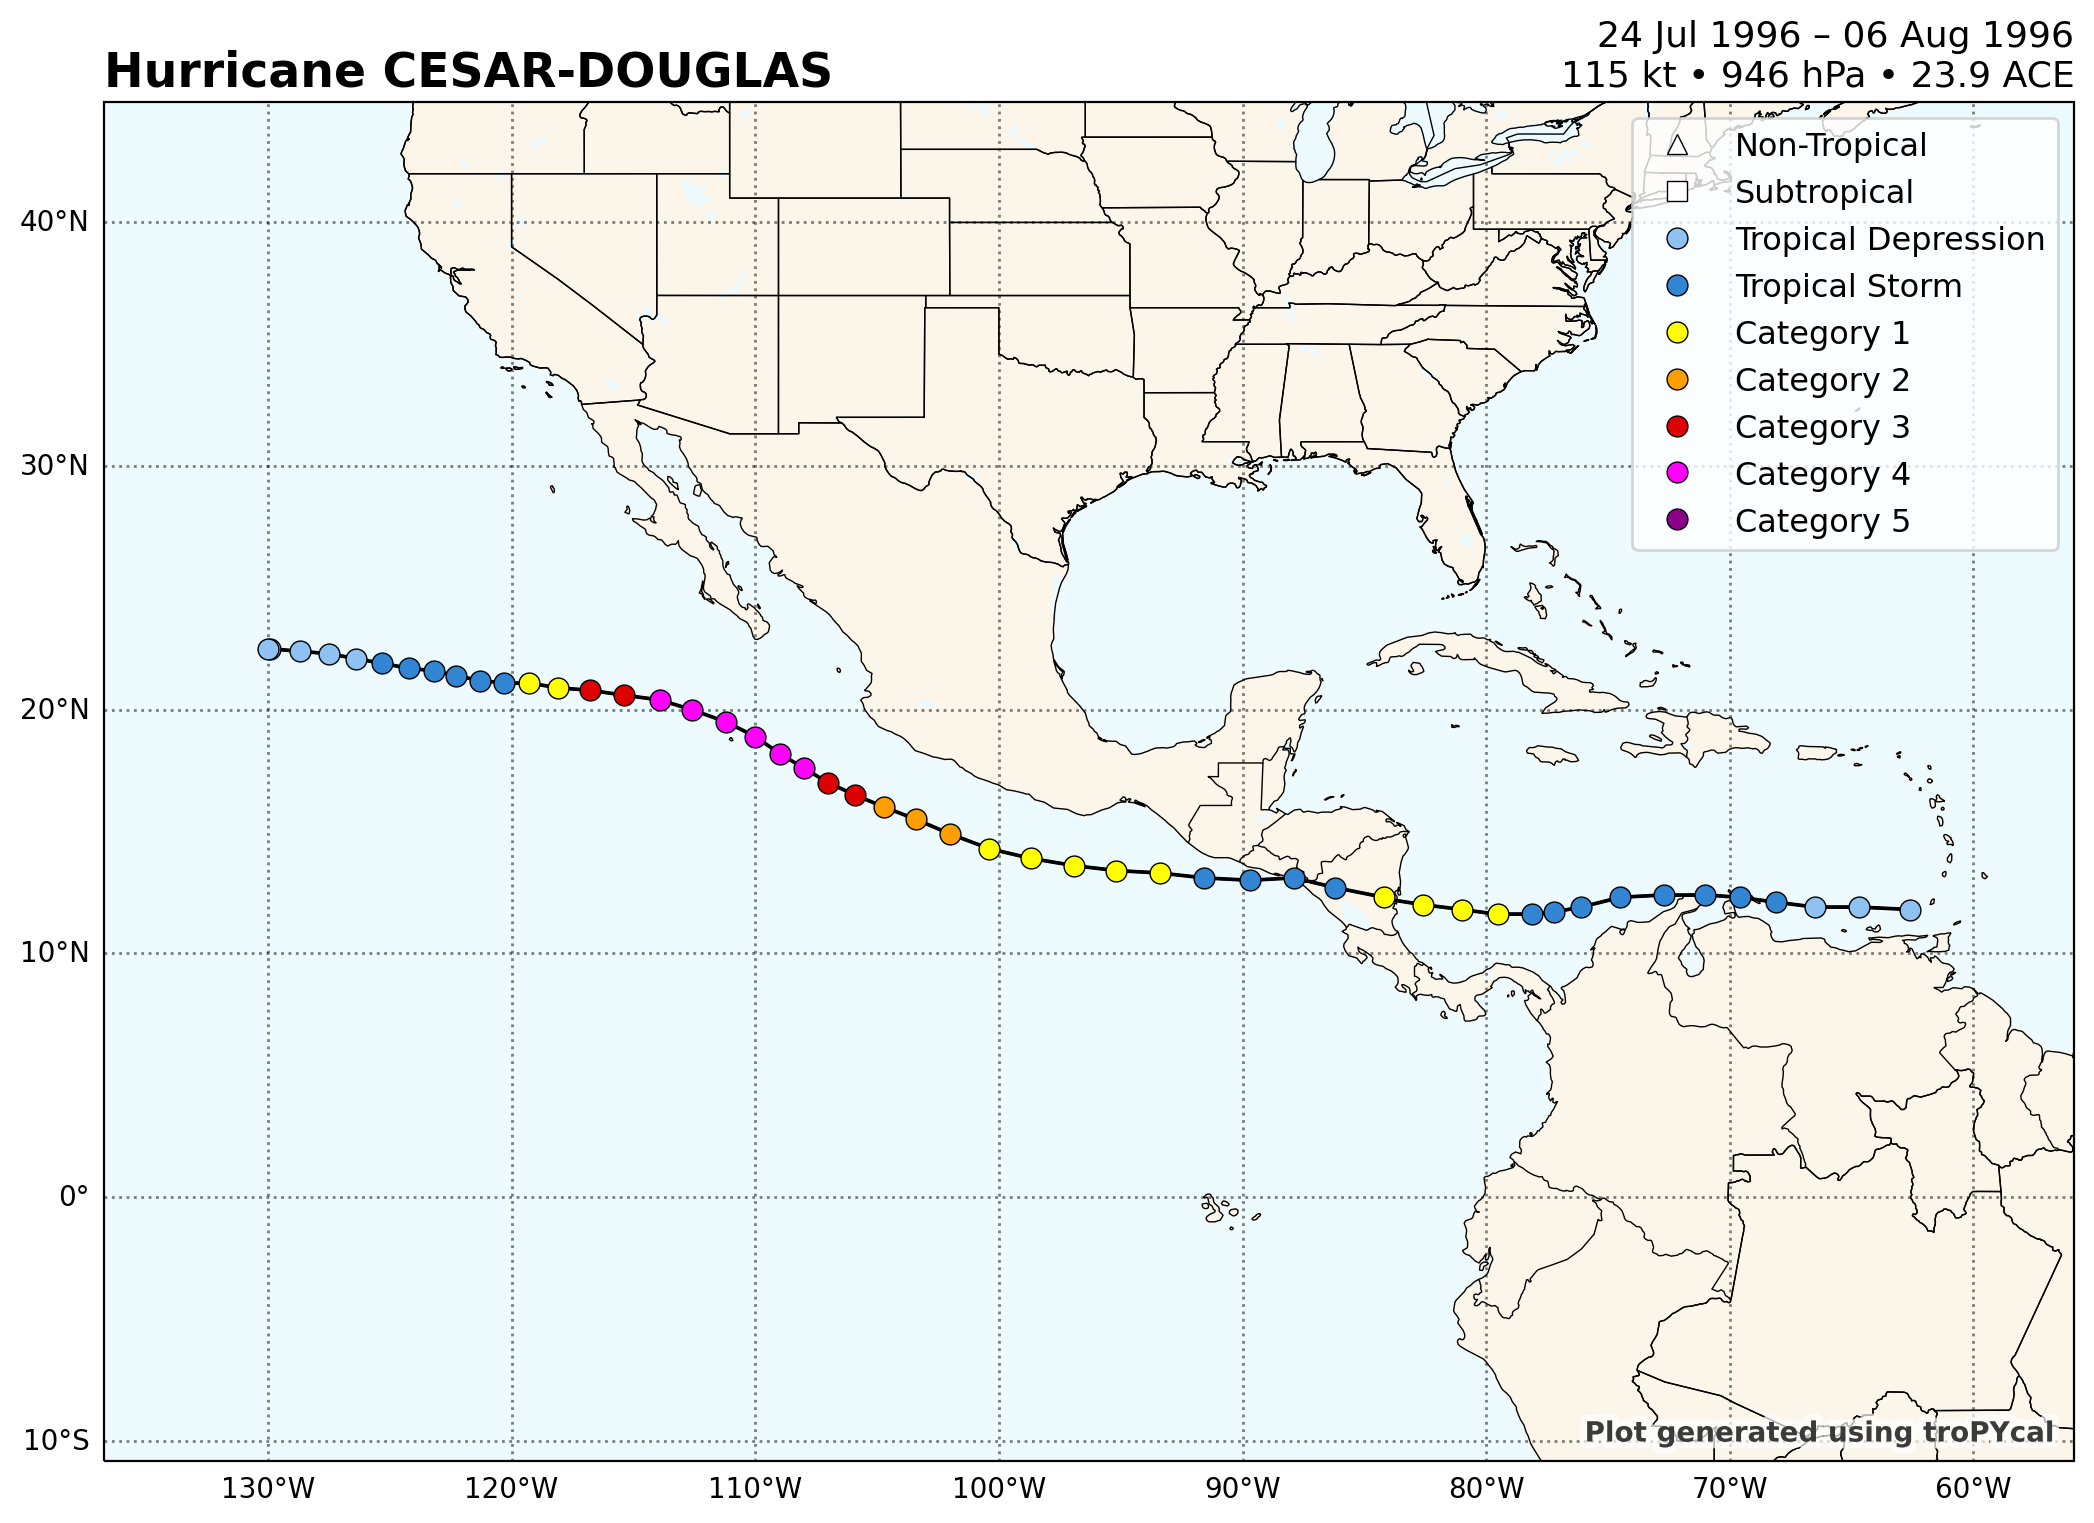

In [22]:
storm.plot()